## NLP-Movie-Review-Sentiment
### Modeling Notebook

Author: Qi Cai

Business Problem:




Stakeholders:
Movie 

Goals:
Our goal is to extract useful info from movie reviews to build machine learning models to correctly predict a review's sentiment being positive or negative.

In [42]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [2]:
# load dataset
df = pd.read_csv('./data/IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#binarizing emotion column
emotion_dict = {'negative': 0, 'positive': 1}
df['sentiment'] = df['sentiment'].map(emotion_dict)

## Start a Dummy Classifier

In [6]:
X = df.review # features
y = df.sentiment # target

# split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [10]:
# Instantiate word tokenizer to later include in the pipeline
tokenizer = TweetTokenizer()

In [11]:
# Create a list of stopwords, based on the eda notebook.
stop_lst = stopwords.words('english') + list(string.punctuation) + ['I',"The",'film','like','movies', 'It', 'would','This','And','But','There','think', 'one','even', 'br',"'s",'film','films','movies', 'movie',"''", '``', "n't", "..."]
# included punctuations and product/company names

In [12]:
# Create a dummy pipeline 
dummy_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                        stop_words=stop_lst)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('dumm', DummyClassifier(random_state=42))]) # first attempt: dummy classifier

dummy_pipe.fit(X_train, y_train)

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fe4c461be50>>)),
                ('dumm', DummyClassifier(random_state=42))])

In [13]:
# predict target with dummy_pipe on testing set
y_pred = dummy_pipe.predict(X_test)
# print a classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      6157
           1       0.00      0.00      0.00      6343

    accuracy                           0.49     12500
   macro avg       0.25      0.50      0.33     12500
weighted avg       0.24      0.49      0.33     12500



/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [14]:
accuracy_score(y_test, y_pred)

0.49256

In [15]:
# Check out confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[6157,    0],
       [6343,    0]])

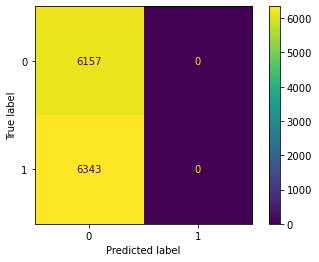

In [16]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

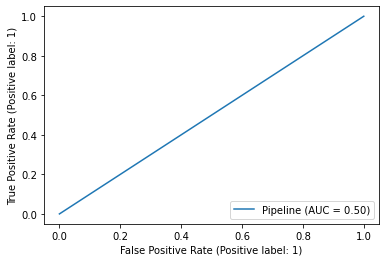

In [17]:
RocCurveDisplay.from_estimator( dummy_pipe, X_test, y_test )

The dummy classifier model performs with a 0.49 accuracy which aligns with the balanced class dataset. AUC score of 0.5. Will see how logistic regression perform with similar pipeline steps!

## Logistic Regression

In [18]:
# create a logistic regression pipeline
logreg_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                        stop_words=stop_lst)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('lr', LogisticRegression(random_state=42))]) 

logreg_pipe.fit(X_train, y_train)

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fe4c461be50>>)),
                ('lr', LogisticRegression(random_state=42))])

In [19]:
# predict target with logreg_pipe on testing set
y_pred = logreg_pipe.predict(X_test)
# print a classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6157
           1       0.89      0.91      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



In [22]:
accuracy_score(y_test, y_pred)

0.89824

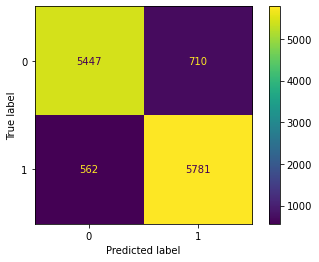

In [20]:
# check confusion matrix and roc auc score
cm2 = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()


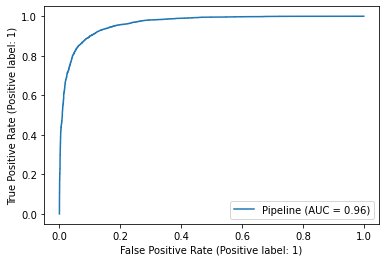

In [21]:
RocCurveDisplay.from_estimator( logreg_pipe, X_test, y_test )

Just comparing this first logistic regression model with the dummy classifier,the accuracy of the model increases from 0.49 to 0.90 by 0.41. Maybe we can try to see if we can improve the model. Before that, we can do a random forest baseline model.

### Random Forest Baseline Model

In [24]:
# create a random forest pipeline
rf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                        stop_words=stop_lst)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('rf', RandomForestClassifier(random_state=42))]) 

rf_pipe.fit(X_train, y_train)

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fe4c461be50>>)),
                ('rf', RandomForestClassifier(random_state=42))])

In [25]:
y_pred = rf_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6157
           1       0.87      0.85      0.86      6343

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



In [26]:
accuracy_score(y_test, y_pred)

0.8612

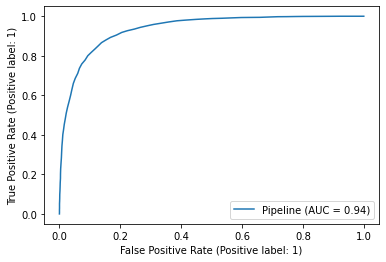

In [27]:
RocCurveDisplay.from_estimator( rf_pipe, X_test, y_test )

Comparing model accuracy of random forest with logistic regression's, logistic regession performs a bit well.

### Support Vector Machines

In [29]:
# Define SVM classifier (you can customize hyperparameters)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42) # linear takes shorter time than poly

In [30]:
# create a pipeline with the svm classifier
svm_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                        stop_words=stop_lst)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('svm', svm_classifier)])

In [32]:
# fit the svm pipeline to the training data
svm_pipe.fit(X_train, y_train)

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fe4c461be50>>)),
                ('svm', SVC(kernel='linear', random_state=42))])

In [35]:
# make prediction on the testing data, evaluate using accuracy and auc score
y_pred = svm_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6157
           1       0.90      0.91      0.91      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



In [36]:
accuracy_score(y_test, y_pred)

0.90368

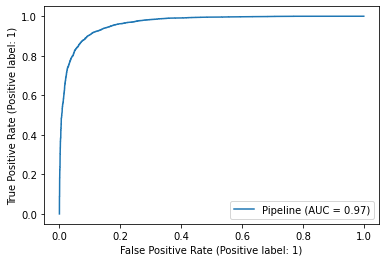

In [37]:
RocCurveDisplay.from_estimator( svm_pipe, X_test, y_test )

Comparing the metrics of the SVM model with the metrics of logistic regression. SVM has better pereformance. However SVM takes a long time to run, we might not be able to hypertune it at the moment.

### Gradient Boosting Model

In [39]:
# create a pipeline with Gradient Boosting
gb_pipe = Pipeline([ ('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                        stop_words=stop_lst)),
    ("Gradient_Boosting", GradientBoostingClassifier(random_state = 42))
])

gb_pipe.fit(X_train, y_train)

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fe4c461be50>>)),
                ('Gradient_Boosting',
                 GradientBoostingClassifier(random_state=42))])

In [40]:
y_pred = gb_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      6157
           1       0.79      0.86      0.83      6343

    accuracy                           0.81     12500
   macro avg       0.82      0.81      0.81     12500
weighted avg       0.82      0.81      0.81     12500



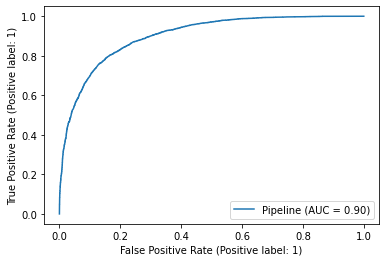

In [41]:
RocCurveDisplay.from_estimator(gb_pipe, X_test, y_test)

Conclusion: logistic regression and SVM perform the best with SVM runs much longer time than logistic regression.

### Logistic Regression Model Improvements

1. Add lemmatization
2. Feature Selection
3. N-grams
4. Regularization

In [45]:
# add lemmatization to the pipeline
# create a logistic regression pipeline
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

# Custom tokenizer function that tokenizes with TweetTokenizer, removes stopwords, lemmatizes, and lowers the text
def custom_tokenizer(text):
    tokens = tokenizer.tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_lst]
    return tokens

# Create the pipeline with lemmatization using TweetTokenizer
logreg_pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=custom_tokenizer)),  # Apply the custom tokenizer
    ('lr', LogisticRegression(random_state=42))
])

In [46]:
logreg_pipe.fit(X_train, y_train)

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function custom_tokenizer at 0x7fe47d0c0700>)),
                ('lr', LogisticRegression(random_state=42))])

In [48]:
y_pred = logreg_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6157
           1       0.89      0.91      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



In [49]:
accuracy_score(y_test, y_pred)

0.89624

Lemmatization does not seem to improve the overall performance. Maybe I play around with feature selection.

In [54]:
tfidf_vectorizer = logreg_pipe.named_steps['vectorizer']

In [55]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [57]:
print (feature_names[:50])

['\x08' '\x10' '###ers' '###ing' '###spoilers' '##cking' '##hole' "#0's"
 "#1's" '#1-rush' '#10' '#100' '#11' '#12' '#16' '#18' '#2--though' '#2-3'
 '#2-the' '#216' '#22' '#232' '#240' '#26' '#29' '#3-the' '#32' '#35'
 '#4-stardust' '#40' '#502' '#58' "#6's" '#6-8' '#608' '#62' '#701' "#8's"
 '#85' '#88' '#91' '#97' '#an' '#bad' '#cheesy' '#ck' '#good' '#ing'
 '#king' '#mn']
